In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#to load csv
df = pd.read_csv('ch2_data.csv')
len(df)

11914

In [3]:
#look at first rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#data cleaning!
#look at column names and change all upper case to lowercase
#change all column names that have spaces to have underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')

#this was done after making the strings... we want to change values like we did column names
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [5]:
#just to see column names would be 
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#need to look at values.. sometimes all caps, sometimes lowercase
#first look at all the values and look for "object" because that is a string
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
#to get an index of all column names that have string values
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [9]:
#to make the index into a python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory data analysis

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [14]:
#to look at first 5 unique values in the columns
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    #to show how many unique values are in the columns
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<AxesSubplot:xlabel='msrp', ylabel='Count'>

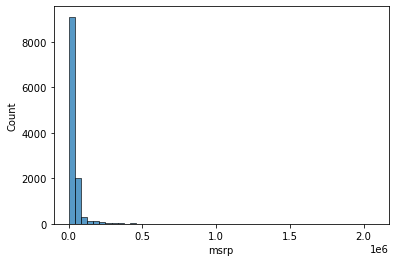

In [15]:
#look at the distribution of prices
sns.histplot(df.msrp, bins =50)
#bins makes bars smaller or larger

<AxesSubplot:xlabel='msrp', ylabel='Count'>

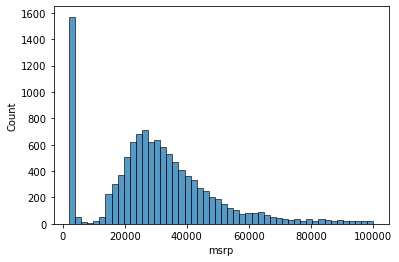

In [16]:
#leg = $1,000,000, so 2.0 is $2 million
#to zoom in a bit because there are long tail outliers
sns.histplot(df.msrp[df.msrp < 100000], bins =50)


In [17]:
#to get rid of long tail, apply log to price
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [18]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

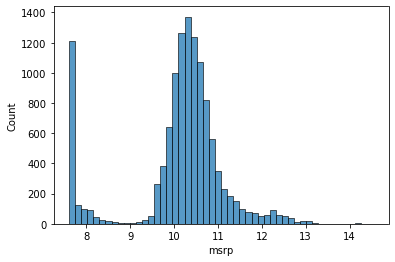

In [19]:
sns.histplot(price_logs, bins =50)

In [20]:
#let's look to see if there is any missing data... nan
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

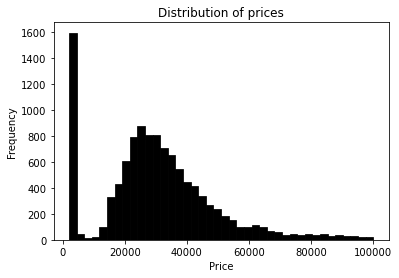

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

# Validation framework

In [22]:
#to divide up the data into 60% training, 20% testing, 20% validating
len(df)

11914

In [23]:
#to get an integer showing 20% of the 11,914
int(len(df) * 0.2)

2382

In [24]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [25]:
n, n_val + n_test + n_train

(11914, 11914)

In [26]:
#to look at sizes of dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [27]:
#to pull data out of 11,914
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [28]:
#shuffle data
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([10491,   289,  7690, ...,   787,  4578,  9529])

In [29]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [41]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2976,chevrolet,corvette,2015,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,64450
11679,suzuki,xl-7,2005,regular_unleaded,185.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,481,24099
2582,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,23200
2907,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,27,18,61,53915
3195,cadillac,cts_coupe,2012,regular_unleaded,318.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,27,18,1624,48150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,lexus,es_300,2001,premium_unleaded_(required),210.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,454,31505
10118,suzuki,sx4,2011,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,29,23,481,19349
5162,infiniti,g37,2008,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,24,18,190,34900
5195,pontiac,g6,2009,regular_unleaded,164.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,midsize,sedan,30,22,210,21165


In [30]:
#Alexey's validation code... set a seed
#np.random.seed(2)

#n = len(df)

#n_val = int(0.2 * n)
#n_test = int(0.2 * n)
#n_train = n - (n_val + n_test)

#idx = np.arange(n)
#np.random.shuffle(idx)

#df_shuffled = df.iloc[idx]

#df_train = df_shuffled.iloc[:n_train].copy()
#df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
#df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [32]:
#Alexey's training code we go back to numpy
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [31]:
np.random.seed(2)
#to reset index column--- do this before training code
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,corvette,2015,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,64450
1,suzuki,xl-7,2005,regular_unleaded,185.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,481,24099
2,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,23200
3,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,27,18,61,53915
4,cadillac,cts_coupe,2012,regular_unleaded,318.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,27,18,1624,48150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,lexus,es_300,2001,premium_unleaded_(required),210.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,454,31505
7146,suzuki,sx4,2011,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,29,23,481,19349
7147,infiniti,g37,2008,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,24,18,190,34900
7148,pontiac,g6,2009,regular_unleaded,164.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,midsize,sedan,30,22,210,21165


# 2.5 Linear regression

In [33]:
df_train.iloc[10]

make                              lexus
model                            gs_400
year                               1999
engine_fuel_type       regular_unleaded
engine_hp                         300.0
engine_cylinders                    8.0
transmission_type             automatic
driven_wheels          rear_wheel_drive
number_of_doors                     4.0
market_category      luxury,performance
vehicle_size                    midsize
vehicle_style                     sedan
highway_mpg                          22
city_mpg                             16
popularity                          454
Name: 10, dtype: object

In [34]:
#look at horsepower, mpg, and popularity
xi = [300, 16, 454]

In [35]:
def g(xi):
    # do something-- we need to add to this
    return 10000

In [36]:
w0 = 0
w = [1, 1, 1]
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [37]:
linear_regression(xi)
# all of this stuff above is just for one car. Below is the entire code for the training dataframe

770

# 2.6 generalize code for a linear regression

In [38]:
def dot(xi, w):
    n = len(xi)
    
    res = w0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    
    return res

In [39]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [40]:
w_new = [w0] + w


def linear_regression(xi):
        xi = [1] + xi
        return dot(xi, w_new)
    
linear_regression(xi)
    


770

# Training linear regression Alexey's code

In [41]:
#Alexey's linear regression code

#def train_linear_regression(X, y):
#    ones = np.ones(X.shape[0])
#    X = np.column_stack([ones, X])

#    XTX = X.T.dot(X)
#    XTX_inv = np.linalg.inv(XTX)
#    w = XTX_inv.dot(X.T).dot(y)
    
#    return w[0], w[1:]

In [43]:
def train_linear_regression(X, y):
    
# create baseline
    ones = np.ones(X.shape[0])
    
# put baseline values into a column
    X = np.column_stack([ones,X])
    
#normal equation    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
# return results    
    return w[0], w[1:]

In [46]:
train_linear_regression(X, y)

NameError: name 'X' is not defined

In [47]:
#of course I get an error!

# 2.8 Car price baseline model

In [48]:
#take a look at the training dataframe
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,acura,tlx,2015,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
1,nissan,350z,2009,regular_unleaded,306.0,6.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,24,17,2009
2,toyota,prius_v,2017,regular_unleaded,134.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,wagon,39,43,2031
3,hyundai,tiburon,2008,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,27,20,1439
4,subaru,outback,2017,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,32,25,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,kia,spectra,2007,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,32,23,1720
7146,pontiac,firebird,2001,premium_unleaded_(required),310.0,8.0,automatic,rear_wheel_drive,2.0,"hatchback,performance",midsize,2dr_hatchback,23,16,210
7147,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
7148,volkswagen,phaeton,2005,premium_unleaded_(recommended),420.0,12.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,17,11,873


In [49]:
# to look at the df to find numerical colums (look for float64 and int64)
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [50]:
#build a model with the columns that are numerical/have float64 or int64
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,290.0,6.0,34,21,204
1,306.0,6.0,24,17,2009
2,134.0,4.0,39,43,2031
3,138.0,4.0,27,20,1439
4,175.0,4.0,32,25,640
...,...,...,...,...,...
7145,138.0,4.0,32,23,1720
7146,310.0,8.0,23,16,210
7147,165.0,6.0,20,15,549
7148,420.0,12.0,17,11,873


In [56]:
#make sure to check to see if there are missing values
df_train[base].isnull().sum()



engine_hp           46
engine_cylinders    19
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [57]:
#we do have missing values in engine_hp and engine_cylinders, so fill them with 0
df_train[base].fillna(0).isnull().sum()



engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [59]:
#extract the values from here
X_train = df_train[base].fillna(0).values

In [60]:
train_linear_regression(X_train, y_train)

(7.472269791336906,
 array([ 9.12830151e-03, -1.09712750e-01,  4.40911664e-02, -8.27571470e-03,
        -9.90393214e-06]))

In [61]:
#to get weights which are w0
w0, w = train_linear_regression(X_train, y_train)

In [62]:
#now we want to apply this trained model to the dataset to get predictions
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

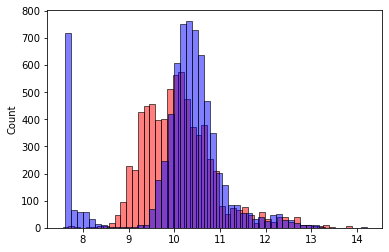

In [64]:
#to plot predictions and get a histogram from the seaborn library
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)

In [65]:
#based upon histograms above, red predictions are less and different than blue training data
#so eyeballing it means this is not a good model
#but to get a more objective test to see if it's a good model fit
#we use RMSE = root means square error

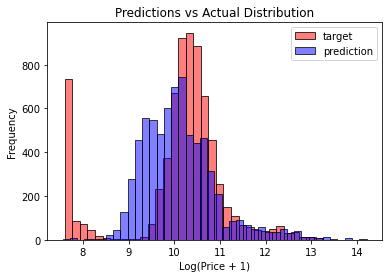

In [69]:
#for a more detailed chart
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

# 2.9 RMSE to get an objective model fit test

In [72]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

0.7484928243264108

# 2.10 Validating the model

In [74]:
#prepare a new dataframe
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [76]:
#train new dataframe and run another RMSE test and compare results to what you
#got above

#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.8045477677783202

# 2.11 adding more to the model, Simple feature engineering

In [77]:
#to see when this data was collected
df_train.year.max()

2017

In [78]:
#to compute how old the cars are and use it in a new dataframe
def prepare_X(df):
    df = df.copy()   #this makes a copy so you don't screw up the original data
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)


In [79]:
#run same code as 2.10 to see if model improved (yes, it went down to 0.51)
#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.519174185105225

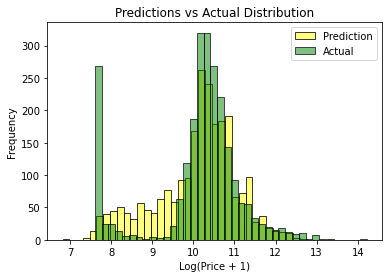

In [82]:
#to plot out the results visually
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='Prediction', color='yellow', alpha=0.5, bins=40)
sns.histplot(y_val, label='Actual', color='green', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()
